In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

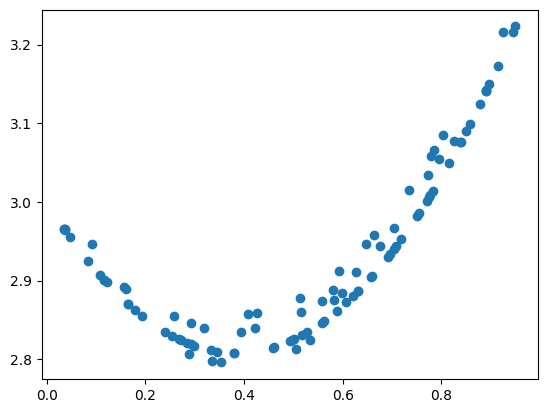

In [4]:
np.random.seed(20)
x=np.random.rand(100)
x[30:40]=x[30:40]+0.024
x=pd.DataFrame(x)
y=(x**2*1.3)-x+3
y[30:60]=y[30:60]+0.027
y[35:40]=y[35:40]-0.04
y[45:50]=y[45:50]+0.01
y[45:50]=y[45:50]-0.02
y[50:60]=y[50:60]+0.022
y[95:100]=y[95:100]+0.03
y=pd.DataFrame(y)
plt.scatter(x=x,y=y)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [7]:
model.fit(x_train,y_train)

LinearRegression()

In [8]:
model.score(x_train,y_train)

0.38437534500903425

<Axes: xlabel='0', ylabel='0'>

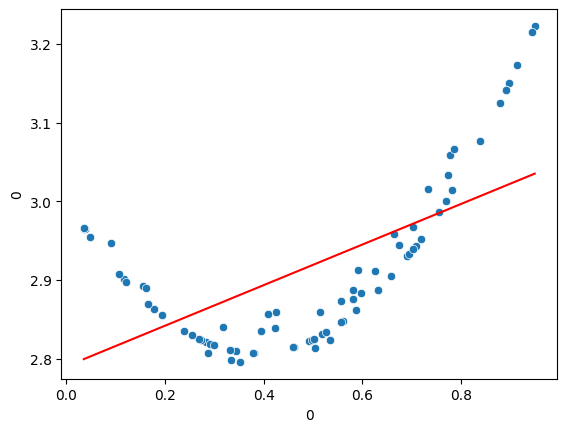

In [9]:
sb.scatterplot(x=x_train[0],y=y_train[0])
sb.lineplot(x=x_train[0],y=model.predict(x_train)[:,0], c='red')

In [10]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
y_train=scale.fit_transform(y_train)

In [11]:
model.fit(x_train,y_train)

LinearRegression()

In [12]:
model.score(x_train,y_train)

0.3843753450090345

In [13]:
from sklearn.preprocessing import PolynomialFeatures
model=PolynomialFeatures(degree=2,include_bias=True)

In [14]:
x_train_poly=model.fit_transform(x_train)
x_test_poly=model.transform(x_test)

In [15]:
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
regression.score(x_train_poly,y_train)

0.9771715606006001

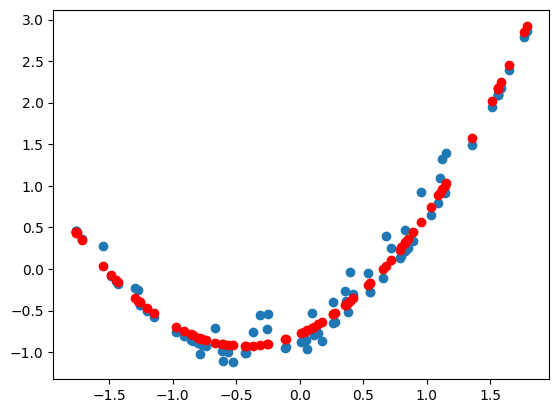

In [16]:
plt.scatter(x=x_train,y=y_train)
plt.scatter(x_train,regression.predict(x_train_poly),c='red')

In [17]:
model=PolynomialFeatures(degree=3,include_bias=True)
x_train_poly=model.fit_transform(x_train)
x_test_poly=model.transform(x_test)
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
regression.score(x_train_poly,y_train)

0.9782573110005719

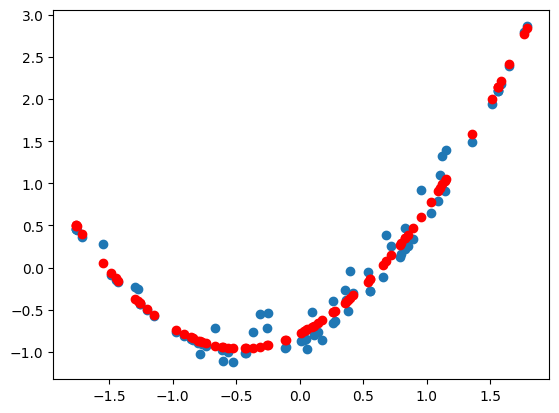

In [18]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,regression.predict(x_train_poly),c='red')

In [19]:
data=pd.DataFrame(np.linspace(-0.7,2.7,40))
data_poly=model.transform(data)

In [20]:
pred_data=regression.predict(data_poly)

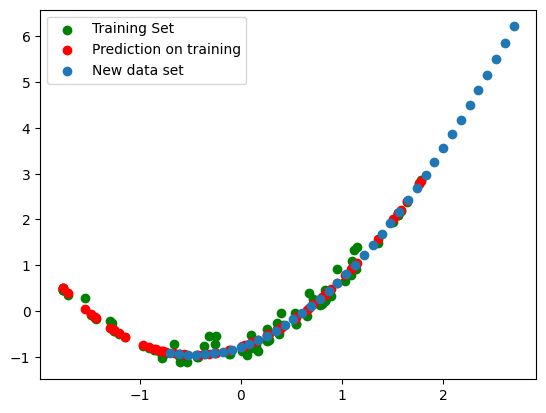

In [21]:
plt.scatter(x_train,y_train,c='green',label='Training Set')
plt.scatter(x_train,regression.predict(x_train_poly),c='red', label='Prediction on training')
plt.scatter(data,pred_data,label='New data set')
plt.legend()

---
# Pipeline

In [22]:
from sklearn.pipeline import Pipeline

In [68]:
def predict(degree):
    np.random.seed(2)
    data=pd.DataFrame(np.random.rand(200))
    model=PolynomialFeatures(degree=degree,include_bias=True)
    data_poly=model.fit_transform(data)
    regression=LinearRegression()
    pipe=Pipeline([
        ('Create Polynomial Regression',model),
        ('Pass Polynomial Transformed Data',regression)
        ])
    pipe.fit(x_train,y_train)
    data_pred=regression.predict(data_poly)

    plt.scatter(x_train,y_train)
    plt.scatter(data,data_pred,c='red')


In [69]:
def pred(degree):
    np.random.seed(2)
    data=pd.DataFrame(np.random.rand(200))
    model=PolynomialFeatures(degree=degree,include_bias=True)
    data_poly=model.fit_transform(data)
    regression=LinearRegression()
    pipe=Pipeline([
        ('Create Polynomial Regression',model),
        ('Pass Polynomial Transformed Data',regression)
        ])
    pipe.fit(x_train,y_train)
    data_pred=regression.predict(data_poly)

    plt.scatter(x_train,y_train)
    plt.scatter(data,data_pred,c='red')


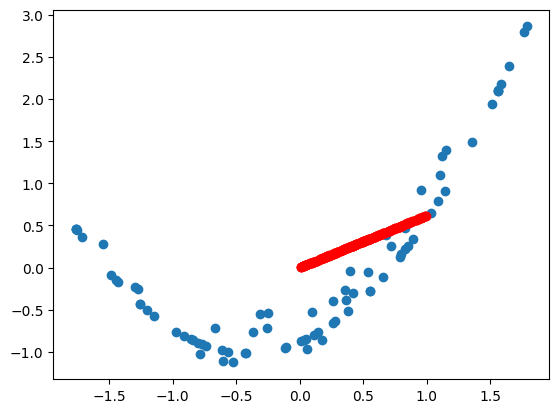

In [70]:
pred(1)

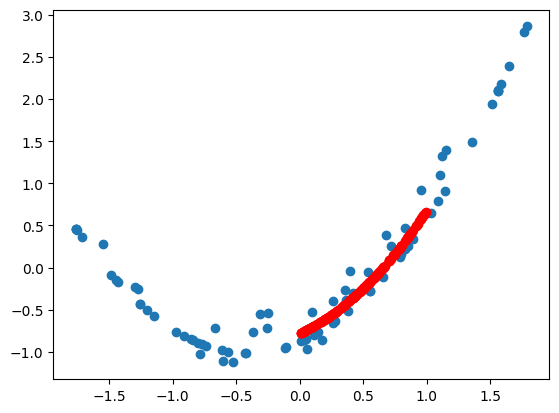

In [71]:
pred(2)

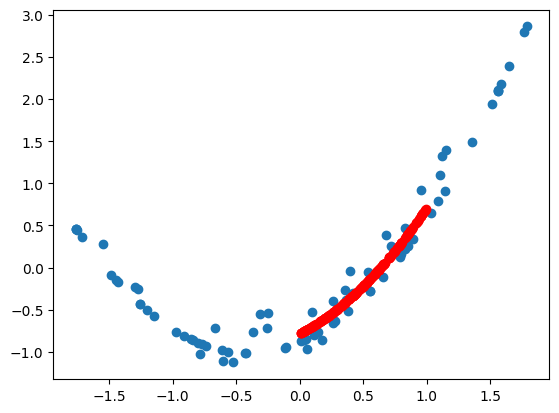

In [72]:
pred(3)

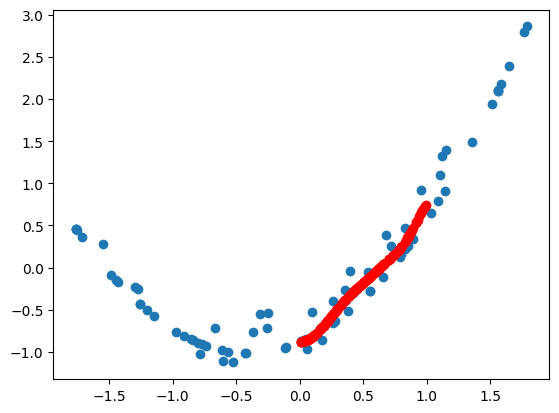

In [82]:
pred(40)